In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_8.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_8.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,2.955530e-11,1.500399e-09,3.744474e-11,0.846896,2.099633e-11,3.157602e-13,0.000001,1.441943e-09,...,3.264399e-09,9.021694e-28,9.169431e-17,1.459148e-17,2.983665e-08,1.229310e-05,-8.902941e-04,6.259715e-27,3.927156e-27,2.535145e-28
1,0.000017,0.405009,1.144741e-10,2.855525e-09,1.412753e-10,0.846896,8.074650e-11,2.346449e-12,0.000002,5.764779e-09,...,7.098486e-09,4.622771e-27,2.082095e-16,4.439010e-17,4.537479e-08,1.262191e-05,-8.905369e-04,4.418269e-26,2.783073e-26,1.845304e-27
2,0.000025,0.405009,2.494498e-10,4.079969e-09,2.997891e-10,0.846896,1.745435e-10,7.618240e-12,0.000004,1.296666e-08,...,1.219995e-08,1.476541e-26,3.735574e-16,9.733291e-17,6.131998e-08,1.294566e-05,-8.907802e-04,1.744905e-25,1.127973e-25,7.502462e-27
3,0.000033,0.405009,4.296283e-10,5.187088e-09,5.027735e-10,0.846896,2.979645e-10,1.748779e-11,0.000005,2.304524e-08,...,1.843816e-08,3.590822e-26,5.890021e-16,1.780214e-16,7.766504e-08,1.326288e-05,-8.910231e-04,5.000770e-25,3.342556e-25,2.211636e-26
4,0.000042,0.405009,6.506809e-10,6.188818e-09,7.415658e-10,0.846896,4.469807e-10,3.312371e-11,0.000006,3.599815e-08,...,2.569638e-08,7.338572e-26,8.557831e-16,2.901166e-16,9.440106e-08,1.357236e-05,-8.912651e-04,1.169755e-24,8.108375e-25,5.317569e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.969303,8.983799e-01,1.000000e+00,6.091488e-01,0.066557,8.794063e-01,9.434736e-01,0.025977,2.743066e-02,...,-1.571821e-20,-6.439083e-22,-5.243513e-23,-1.049423e-25,-4.935730e-27,-1.375131e-28,-6.788427e-31,-7.911340e-21,3.627476e-22,-4.621758e-22
119995,0.999967,0.969303,8.983799e-01,1.000000e+00,6.091488e-01,0.066557,8.794063e-01,9.434736e-01,0.025977,2.743066e-02,...,-1.571028e-20,-6.435962e-22,-5.243683e-23,-1.049946e-25,-4.931415e-27,-1.375043e-28,-6.790760e-31,-7.913069e-21,3.630157e-22,-4.621066e-22
119996,0.999975,0.969303,8.983799e-01,1.000000e+00,6.091488e-01,0.066557,8.794063e-01,9.434736e-01,0.025977,2.743066e-02,...,-1.570340e-20,-6.441064e-22,-5.239273e-23,-1.049643e-25,-4.930950e-27,-1.375154e-28,-6.792063e-31,-7.916825e-21,3.632043e-22,-4.620374e-22
119997,0.999983,0.969303,8.983799e-01,1.000000e+00,6.091488e-01,0.066557,8.794063e-01,9.434736e-01,0.025977,2.743066e-02,...,-1.571821e-20,-6.440986e-22,-5.240356e-23,-1.049515e-25,-4.933221e-27,-1.374991e-28,-6.794234e-31,-7.914284e-21,3.627456e-22,-4.620353e-22


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

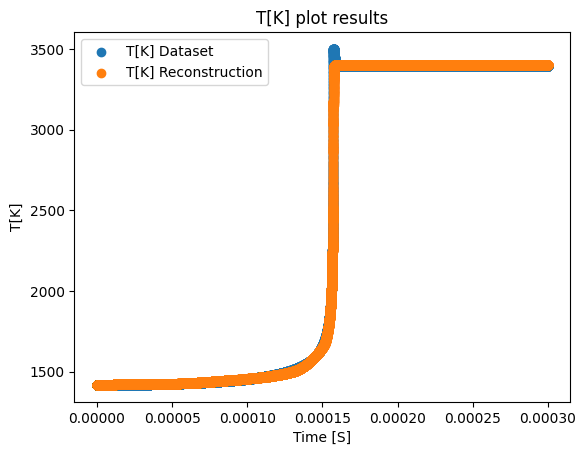

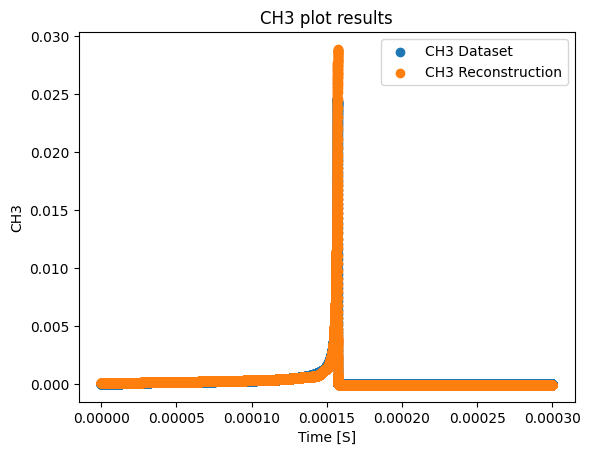

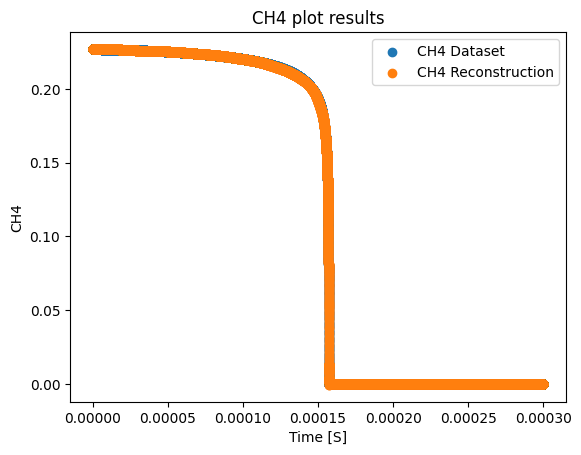

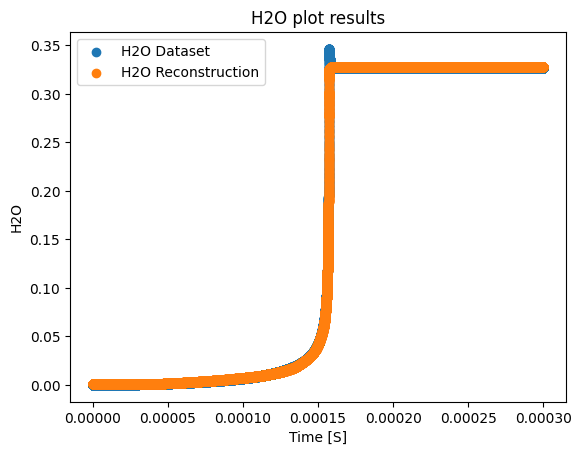

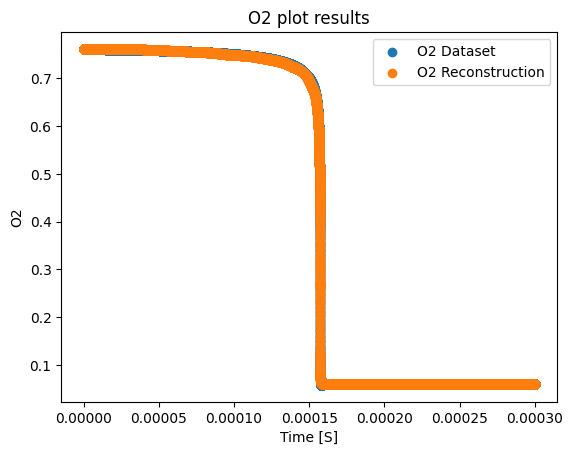

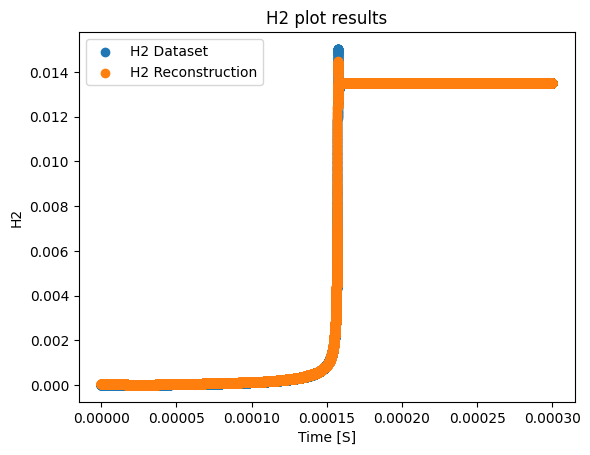

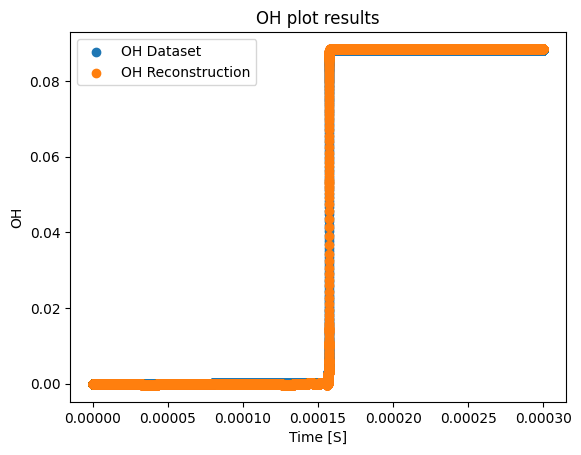

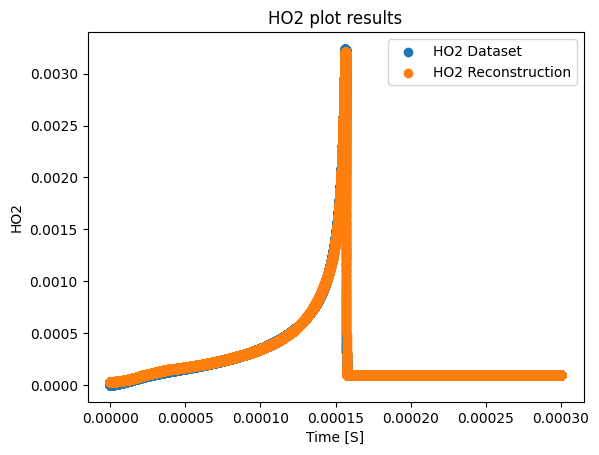

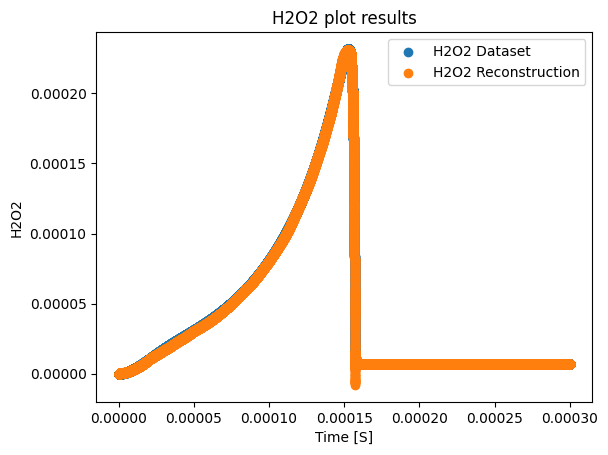

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

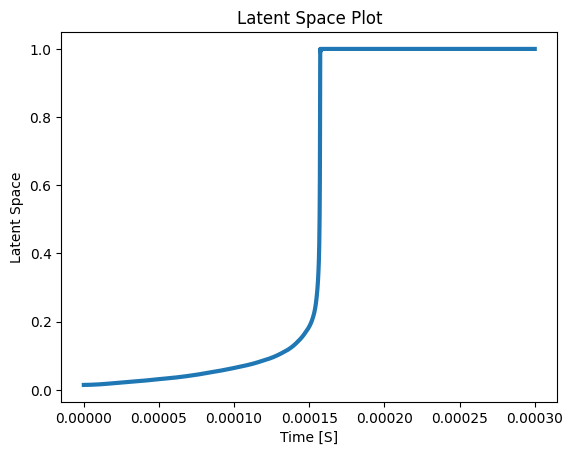

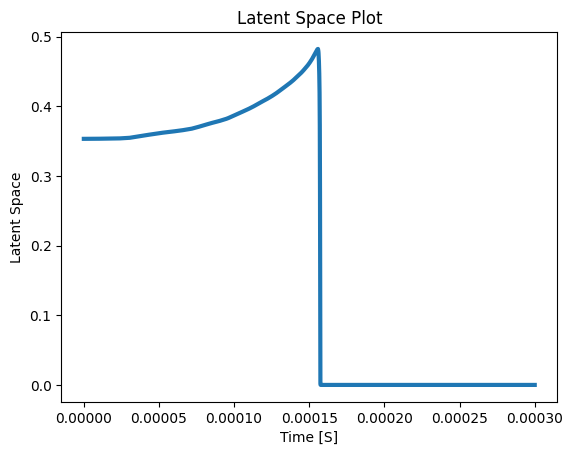

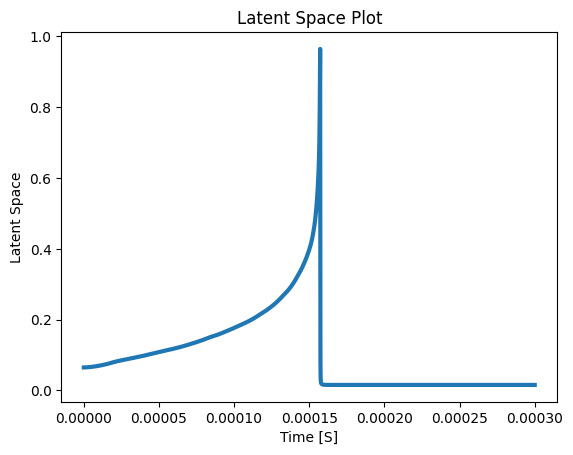

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,2.955530e-11,1.500399e-09,3.744474e-11,0.846896,2.099633e-11,3.157602e-13,0.000001,1.441943e-09,3.471111e-35,...,8.445652e-10,5.419653e-29,2.272142e-17,2.206733e-18,1.471080e-08,1.196103e-05,-8.900524e-04,2.178789e-28,1.500028e-28,8.567921e-30
1,0.405009,1.144741e-10,2.855525e-09,1.412753e-10,0.846896,8.074650e-11,2.346449e-12,0.000002,5.764779e-09,1.633554e-33,...,3.264399e-09,9.021694e-28,9.169431e-17,1.459148e-17,2.983665e-08,1.229310e-05,-8.902941e-04,6.259715e-27,3.927156e-27,2.535145e-28
2,0.405009,2.494498e-10,4.079969e-09,2.997891e-10,0.846896,1.745435e-10,7.618240e-12,0.000004,1.296666e-08,4.380042e-32,...,7.098486e-09,4.622771e-27,2.082095e-16,4.439010e-17,4.537479e-08,1.262191e-05,-8.905369e-04,4.418269e-26,2.783073e-26,1.845304e-27
3,0.405009,4.296283e-10,5.187088e-09,5.027735e-10,0.846896,2.979645e-10,1.748779e-11,0.000005,2.304524e-08,3.338852e-31,...,1.219995e-08,1.476541e-26,3.735574e-16,9.733291e-17,6.131998e-08,1.294566e-05,-8.907802e-04,1.744905e-25,1.127973e-25,7.502462e-27
4,0.405009,6.506809e-10,6.188818e-09,7.415658e-10,0.846896,4.469807e-10,3.312371e-11,0.000006,3.599815e-08,-1.607936e-32,...,1.843816e-08,3.590822e-26,5.890021e-16,1.780214e-16,7.766504e-08,1.326288e-05,-8.910231e-04,5.000770e-25,3.342556e-25,2.211636e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.969303,8.983799e-01,1.000000e+00,6.091488e-01,0.066557,8.794063e-01,9.434736e-01,0.025977,2.743066e-02,2.385998e-06,...,-1.568280e-20,-6.451926e-22,-5.236895e-23,-1.049890e-25,-4.932302e-27,-1.375179e-28,-6.788589e-31,-7.916894e-21,3.632149e-22,-4.621087e-22
119995,0.969303,8.983799e-01,1.000000e+00,6.091488e-01,0.066557,8.794063e-01,9.434736e-01,0.025977,2.743066e-02,2.385998e-06,...,-1.571821e-20,-6.439083e-22,-5.243513e-23,-1.049423e-25,-4.935730e-27,-1.375131e-28,-6.788427e-31,-7.911340e-21,3.627476e-22,-4.621758e-22
119996,0.969303,8.983799e-01,1.000000e+00,6.091488e-01,0.066557,8.794063e-01,9.434736e-01,0.025977,2.743066e-02,2.385998e-06,...,-1.571028e-20,-6.435962e-22,-5.243683e-23,-1.049946e-25,-4.931415e-27,-1.375043e-28,-6.790760e-31,-7.913069e-21,3.630157e-22,-4.621066e-22
119997,0.969303,8.983799e-01,1.000000e+00,6.091488e-01,0.066557,8.794063e-01,9.434736e-01,0.025977,2.743066e-02,2.385998e-06,...,-1.570340e-20,-6.441064e-22,-5.239273e-23,-1.049643e-25,-4.930950e-27,-1.375154e-28,-6.792063e-31,-7.916825e-21,3.632043e-22,-4.620374e-22


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.874118,0.879436,0.880573,0.880203,-0.880185,0.880605,0.878023,-0.054529,-0.144752,0.871897,...,-0.254847,-0.253083,-0.253466,-0.253466,-0.254026,-0.329724,-0.064255,-0.253229,-0.253220,-0.253316
1,-0.213597,-0.292235,-0.293485,-0.293362,0.211964,-0.293496,-0.209526,0.701608,0.703882,-0.203562,...,0.798176,0.813873,0.814247,0.814246,0.808570,0.739923,0.255635,0.814016,0.814019,0.814103
2,-0.210478,-0.288147,-0.289399,-0.289278,0.208843,-0.289410,-0.206404,0.703814,0.701981,-0.200439,...,0.795230,0.816183,0.815312,0.815312,0.805714,0.739098,0.253085,0.816054,0.815746,0.815869


OH     0.880605
H      0.880573
CO2    0.880217
O      0.880203
H2     0.879436
Name: 0, dtype: float64
CH3OH    0.898556
C2H4     0.898275
C2H5     0.897625
CH3O     0.897291
CH3      0.897202
Name: 1, dtype: float64
CH3     0.900453
CH3O    0.900339
C2H5    0.900058
C2H4    0.899407
C2H3    0.898768
Name: 2, dtype: float64


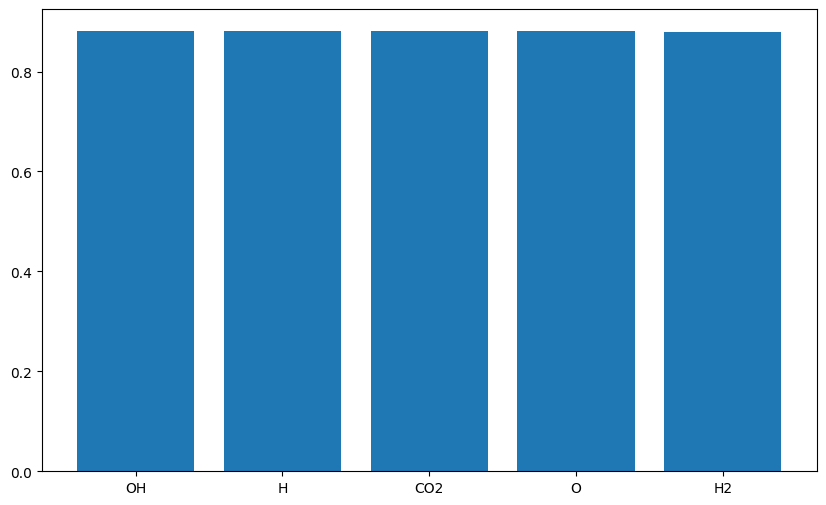

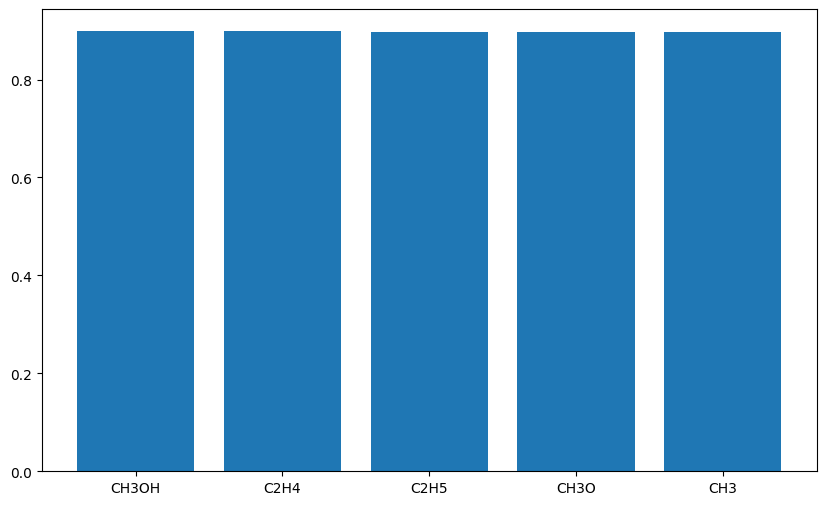

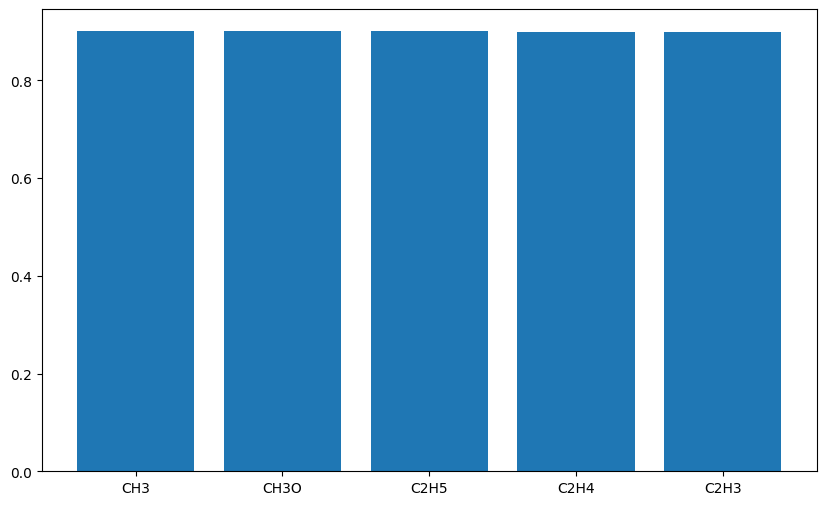

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.943458,0.944102,0.944996,0.944993,-0.944993,0.944997,0.943571,-0.238012,-0.407394,0.939490,...,-0.639996,-0.637915,-0.638683,-0.638683,-0.639321,-0.658106,-0.176710,-0.638215,-0.638184,-0.638389
1,-0.605473,-0.658125,-0.659007,-0.659005,0.606798,-0.659008,-0.605172,0.798878,0.821451,-0.596025,...,0.880691,0.902542,0.902856,0.902855,0.894802,0.883934,0.307752,0.902656,0.902667,0.902727
2,-0.602574,-0.653692,-0.656458,-0.656456,0.604844,-0.656458,-0.602064,0.800832,0.819401,-0.589275,...,0.873265,0.902414,0.900974,0.900974,0.887583,0.879419,0.303078,0.902144,0.901717,0.901832


OH     0.944997
H      0.944996
CO2    0.944993
O      0.944993
H2     0.944102
Name: 0, dtype: float64
CH3OH    0.957313
C2H4     0.957008
C2H5     0.956388
CH3O     0.956223
CH3      0.956068
Name: 1, dtype: float64
CH3      0.958026
CH3O     0.958010
C2H5     0.957847
C2H4     0.957530
CH3OH    0.957351
Name: 2, dtype: float64


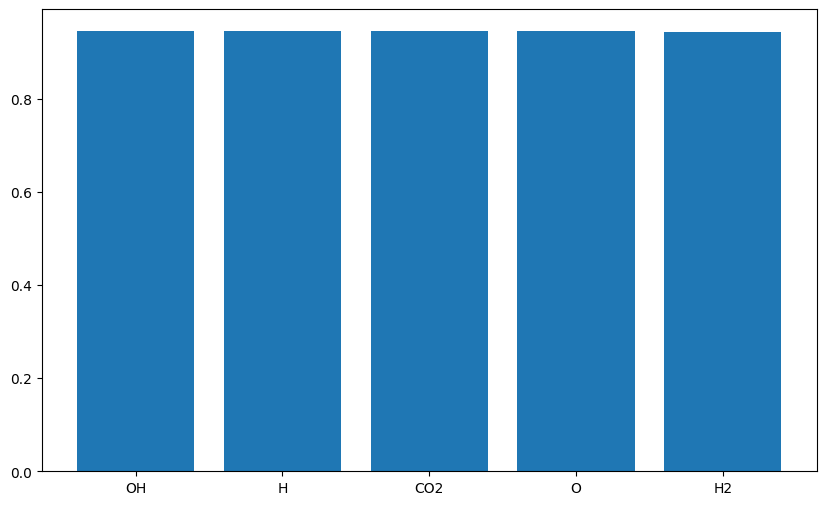

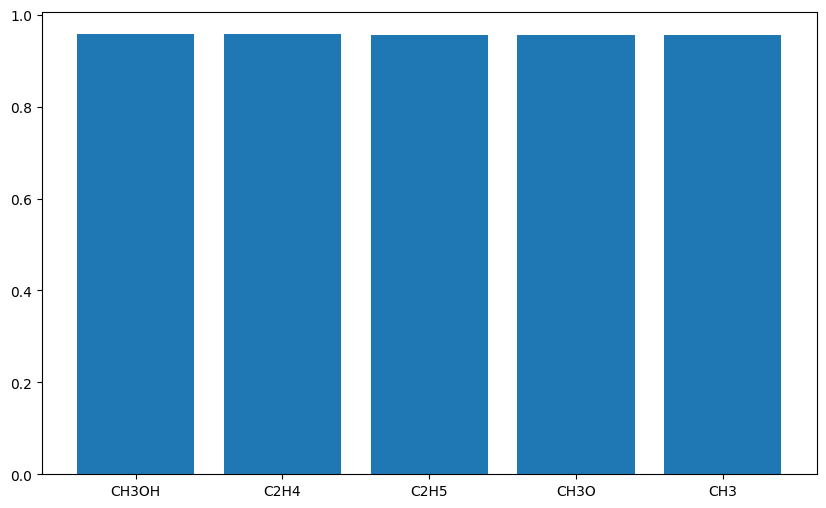

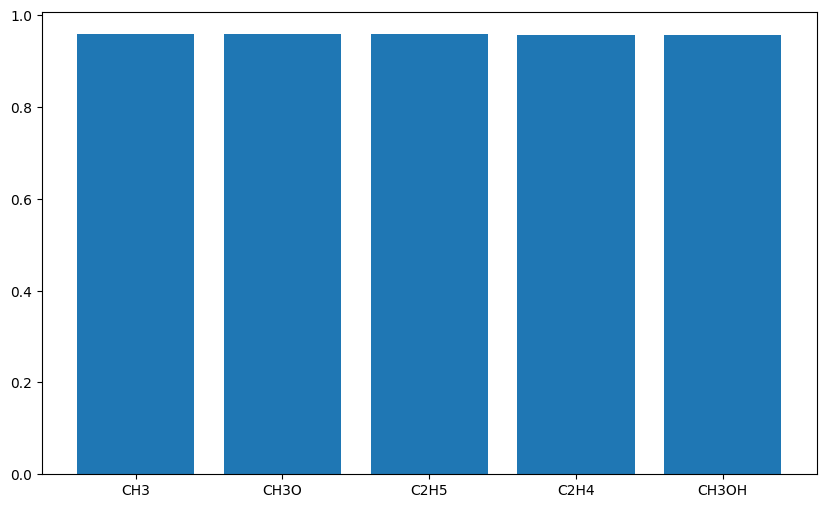

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.874104,0.879438,0.880575,0.880205,-0.880187,0.880607,0.878007,-0.054557,-0.144764,0.871881,...,-0.254843,-0.253081,-0.253462,-0.253461,-0.254021,-0.329720,-0.064261,-0.253227,-0.253223,-0.253313
1,-0.213578,-0.292223,-0.293474,-0.293351,0.211947,-0.293484,-0.209509,0.701641,0.703890,-0.203546,...,0.798151,0.813889,0.814261,0.814260,0.808547,0.739934,0.255622,0.814032,0.814036,0.814118
2,-0.210460,-0.288136,-0.289388,-0.289267,0.208827,-0.289399,-0.206388,0.703818,0.701976,-0.200422,...,0.795206,0.816160,0.815287,0.815288,0.805690,0.739071,0.253086,0.816031,0.815724,0.815845


OH     0.880607
H      0.880575
CO2    0.880219
O      0.880205
H2     0.879438
Name: 0, dtype: float64
CH3OH    0.898593
C2H4     0.898295
C2H5     0.897644
CH3O     0.897328
CH3      0.897221
Name: 1, dtype: float64
CH3     0.900446
CH3O    0.900340
C2H5    0.900038
C2H4    0.899387
C2H3    0.898804
Name: 2, dtype: float64


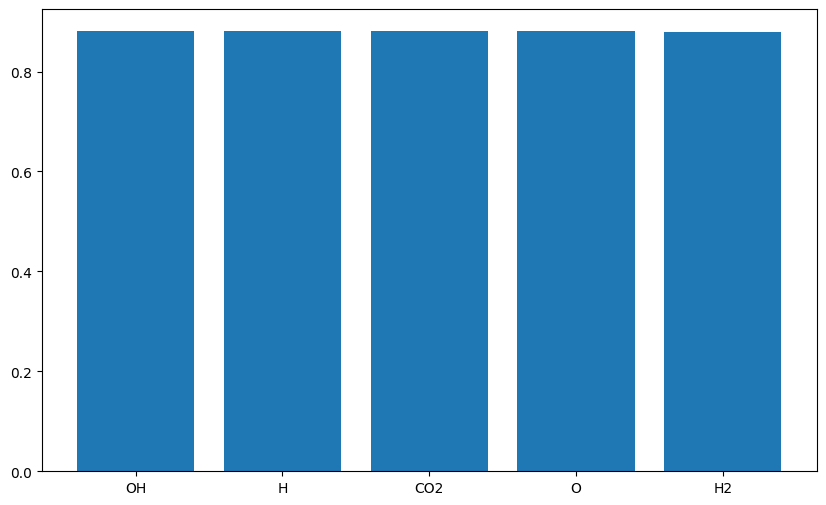

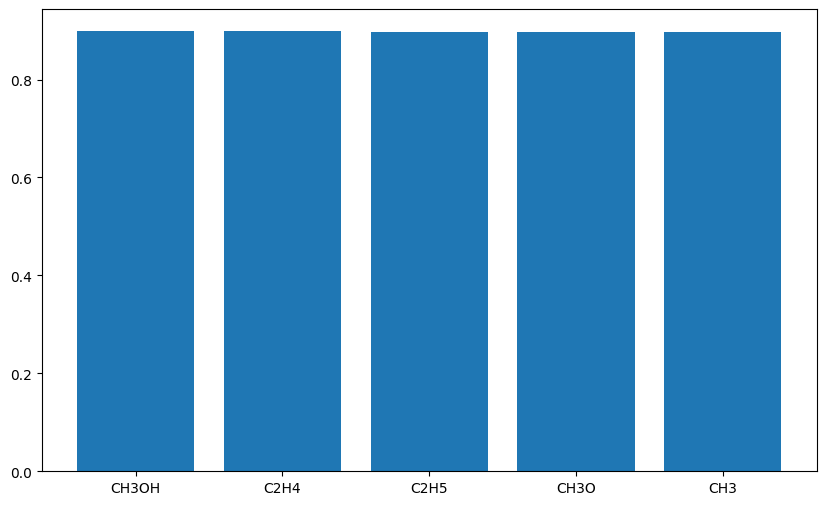

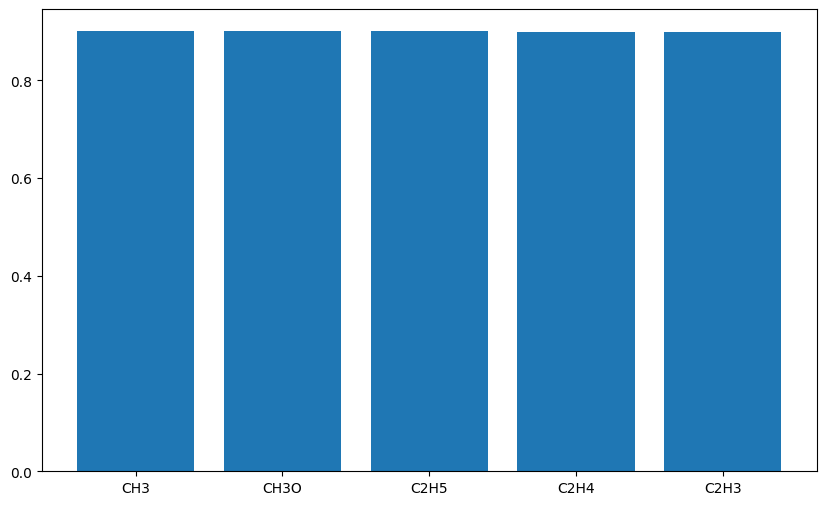

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)